# **Sentiment Analysis using Twitter API**

In [0]:
# !pip install tweepy

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt

In [0]:
## Connecting with the Twitter API ##

consumer_key = 'copy here your keys'
consumer_secret = 'copy here your keys'
access_token = 'copy here your keys'
access_token_secret = 'copy here your keys'

# Establish the connection with API #
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)



In [0]:
## Define a function to calculate the percentage 
def percentage(part, whole):
    return 100 * float(part)/float(whole)


In [0]:

def get_sentiment():

  searchTerm = input("Enter Keyword/Tag to search about: ")  # Search for the Term and define number of tweets #
  NoOfTerms = int(input("Enter how many tweets to search: "))
  
  # Get no of tweets and searched term together #
  tweets = tweepy.Cursor(api.search, q=searchTerm).items(NoOfTerms)


  # Create variables to hold the average polarity #

  positive = 0
  negative = 0
  neutral = 0
  polarity = 0


  for tweet in tweets:
     analysis = TextBlob(tweet.text) 
     polarity += analysis.sentiment.polarity

     if(analysis.sentiment.polarity == 0):
         neutral += 1

     elif(analysis.sentiment.polarity < 0.00):
         negative += 1

     elif(analysis.sentiment.polarity > 0.00):
         positive += 1

  # Generate the percentages using previously created function percentage #
  positive = percentage(positive, NoOfTerms)
  negative = percentage(negative, NoOfTerms)
  neutral  = percentage(neutral, NoOfTerms)
  polarity  = percentage(polarity, NoOfTerms)

  # Limit the decimal upto 2 places #
  positive = format(positive, '.2f')
  negative = format(negative, '.2f')
  neutral = format(neutral, '.2f')


  ## Print the result ##

  print("How people are reacting on " + searchTerm + 
        " By analyzing" + str(NoOfTerms) + " Tweets ")

  if (polarity == 0):
      print("Neutral")

  elif (polarity < 0.00):
      print("Negative")

  elif (polarity > 0.00):
      print("Positive")

  ## Print the Pie Chart ##

  labels = ['Positive ['+str(positive)+'%]', 
            'Neutral ['+str(neutral)+'%]', 
            'Negative ['+str(negative)+'%]']

  sizes = [positive, neutral, negative]
  colors = ['yellowgreen', 'gold', 'red']
  patches, texts = plt.pie(sizes, colors = colors, startangle = 90)
  plt.legend(patches, labels, loc = "best")
  plt.title('How people are reacting on  '
            +searchTerm+' by analyzing '
            +str(NoOfTerms)+' Tweets ')
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

Enter Keyword/Tag to search about: Artificial Intelligence
Enter how many tweets to search: 100
How people are reacting on Artificial Intelligence By analyzing100 Tweets 
Negative


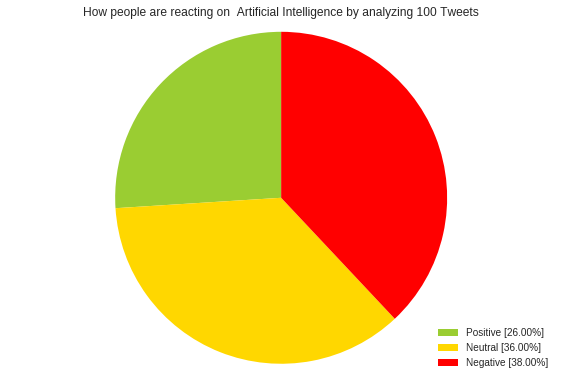

In [26]:
get_sentiment()
  

Enter Keyword/Tag to search about: Machine Learning
Enter how many tweets to search: 100
How people are reacting on Machine Learning By analyzing100 Tweets 
Negative


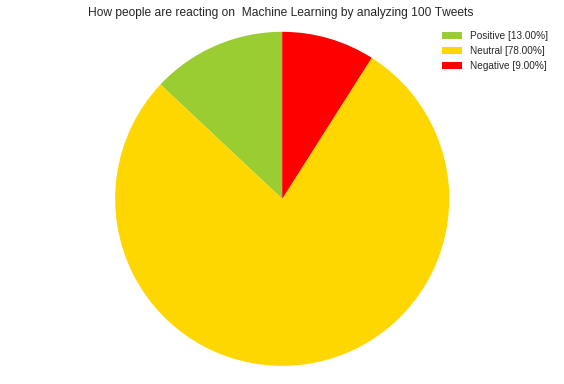

In [27]:
get_sentiment()
  

Enter Keyword/Tag to search about: Robots
Enter how many tweets to search: 100
How people are reacting on Robots By analyzing100 Tweets 
Positive


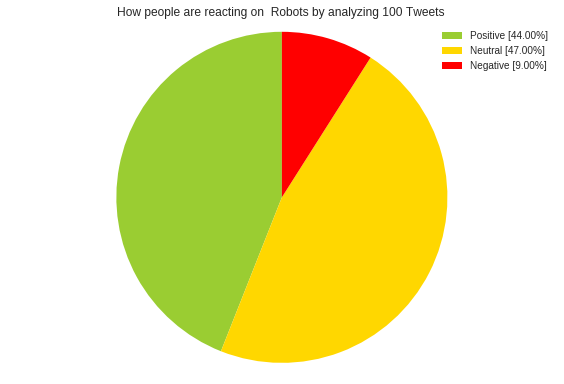

In [28]:
get_sentiment()
  